In [14]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np

In [ ]:
# Import data
df = pd.read_csv("https://raw.githubusercontent.com/kay102dev/customer-clustering/refs/heads/main/data/online_shoppers_intention.csv", delimiter=",")


In [15]:
# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

Removed 14 samples
(12316, 18)


In [16]:
# Explore type of data and feature names
df.sample(8)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10841,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12144,0.0,0.0,0.0,0.0,9.0,348.750000,0.000000,0.029630,0.000000,0.0,Dec,2,5,1,1,Returning_Visitor,False,False
5682,1.0,66.4,0.0,0.0,39.0,606.366667,0.015789,0.026754,0.000000,0.0,Jul,2,2,1,4,Returning_Visitor,False,False
10341,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
9132,0.0,0.0,0.0,0.0,3.0,54.500000,0.000000,0.066667,0.000000,0.0,Nov,2,5,2,3,Returning_Visitor,False,False
8552,0.0,0.0,0.0,0.0,72.0,2304.150000,0.008451,0.020355,3.178183,0.0,Nov,3,2,1,2,Returning_Visitor,False,True
3056,0.0,0.0,0.0,0.0,17.0,1356.000000,0.000000,0.035294,0.000000,0.6,May,4,1,3,3,Returning_Visitor,False,False
9359,0.0,0.0,0.0,0.0,16.0,530.625000,0.000000,0.012500,0.000000,0.0,Nov,2,5,3,3,Returning_Visitor,True,False


In [17]:
# Select continuous variables for clustering
X = df.iloc[:, 0:10]
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0


In [18]:
# DATA PREPROCESSING 
# Identify rows with negative values in numeric columns
mask = (df.select_dtypes(include=[np.number]) < 0).any(axis=1)

# Drop rows with negative values
df = df[~mask]
# Check for negative values in each column
negative_counts = (df.select_dtypes(include=[np.number]) < 0).sum()
print(negative_counts)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64


In [19]:
# transform using square root 
X = np.sqrt(df.iloc[:, 0:10])

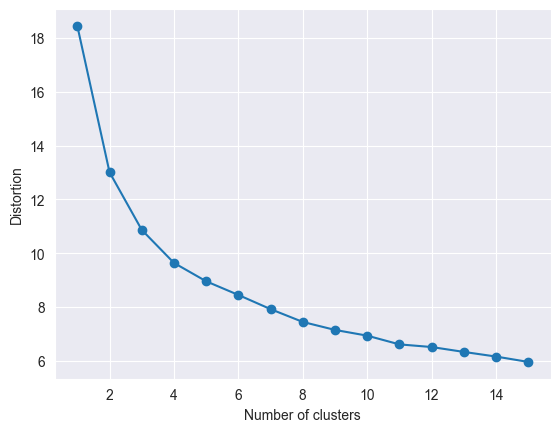

In [20]:
# Find optimal number of clusters

# 1. Elbow method
# Calculate distortions
distortions = []
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, 
                max_iter=300,tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])

# Plot distortions
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [21]:
# # 2. Silhouette method
# sil_2 = []
# kmax = 10
# ### BEGIN SOLUTION
# for k in range(2, kmax+1):
#     print(f"Running KMeans for k={k}")
#     try:
#         kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
#         labels = kmeans.labels_
#         sil_score = silhouette_score(X, labels, metric='euclidean')
#         sil_2.append(sil_score)
#         print(f"Silhouette score for k={k}: {sil_score}")
#     except Exception as e:
#         print(f"An error occurred for k={k}: {e}")
# ### END SOLUTION
# # Plot
# plt.plot(range(2, kmax+1), sil_2, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette score')
# plt.show()

Using the output from the elbow and silhouette method to decide how many clusters to use.

In [22]:
# Cluster the data
km = KMeans(n_clusters=2, init='k-means++', 
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
km.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [23]:
# Check how many observations are in each cluster
# Get the cluster labels
labels = km.labels_

# Count the number of observations in each cluster
unique, counts = np.unique(labels, return_counts=True)

# Create a dictionary for better readability and add 'cluster' to each label
cluster_counts = {f'cluster {label}': count for label, count in zip(unique, counts)}
print(cluster_counts)

{'cluster 0': np.int64(8535), 'cluster 1': np.int64(3748)}


In [24]:
# Set up a dataframe with cluster allocations
Xnew = X.copy()
Xnew["CLUSTERS"] = km.labels_

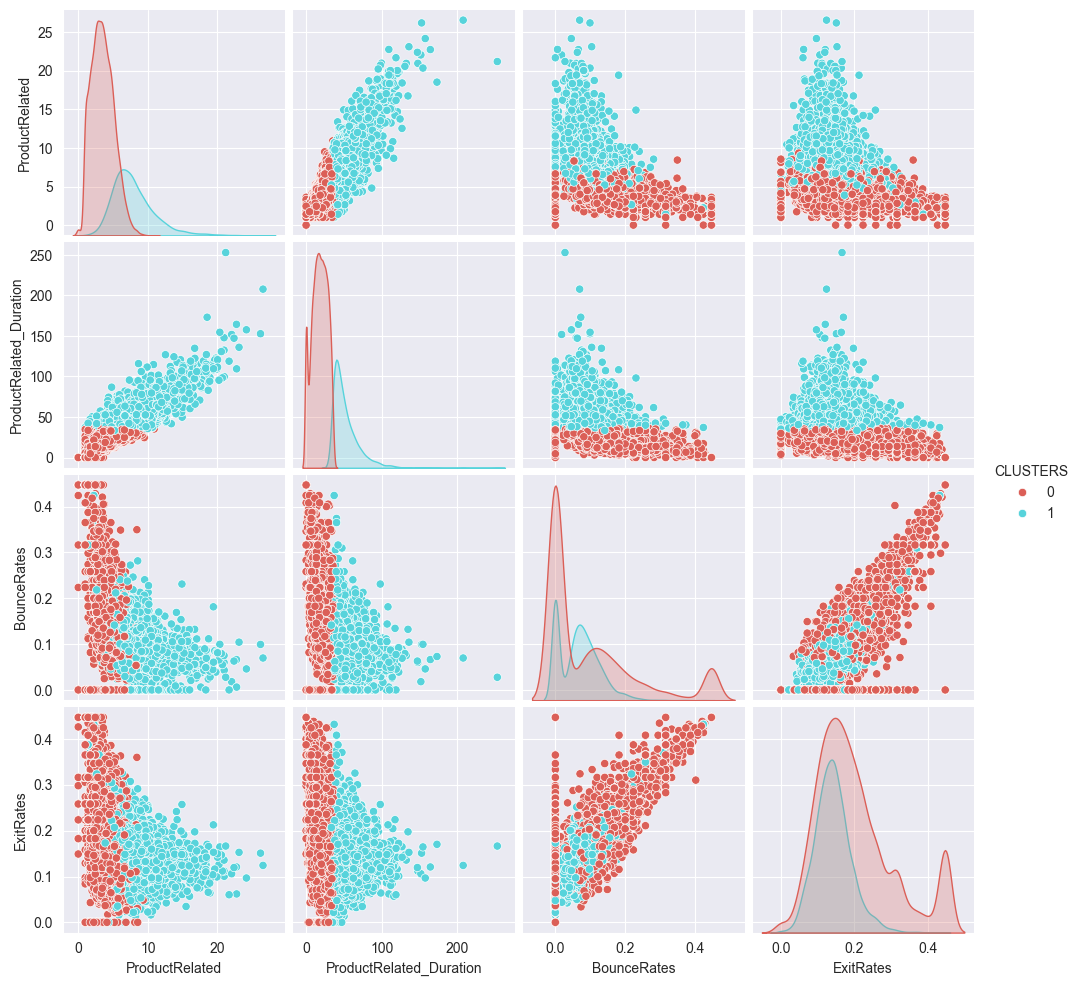

In [25]:
# Plot the following variables and their clusters
var = ['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']

# Plot using seaborn
# Set up dataframe with cluster allocations
sns.pairplot(Xnew, vars=var, hue="CLUSTERS",   palette=sns.color_palette("hls", Xnew["CLUSTERS"].nunique()) )

In [26]:
# Group by 'CLUSTERS' and calculate the mean of 'ProductRelated_Duration'
average_durations = Xnew.groupby('CLUSTERS')['ProductRelated_Duration'].mean()

# Print the results
print(average_durations)

CLUSTERS
0    17.578479
1    51.995689
Name: ProductRelated_Duration, dtype: float64
